# Name: Edward Tupacz

## Due 12/02 15:00


# Markov Chains: Clicking Circles

## Introduction

In the video game *osu!*, the player must click on circles in succession to the rhythm of a song. To relate this to a Markov chain, let the chance a player clicks on a circle be 90%. Let the chance the player clicks the next circle after missing one be 50%, and let the chance a player also clicks on the first circle be 90%. This relationship can be shown in the following diagram: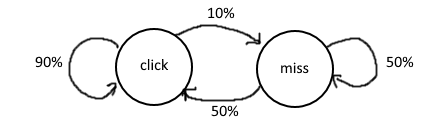


# Method

To find the chances of clicking a circle k times in a row, we can display the relationship as an equation:

For the first circle, we have an initial state vector:

$click_{1} = .9$

$miss_{1} = .1$

For the second circle:

$c_{2} = .9c_{1} + .5m_{1} = .9 * .9 + .5 * .1 = .86$

$m_{2} = .1c_{1} + .5m_{1} = .1 * .9 + .5 * .1 = .14$

To generalize this, the equation can be expressed as:

$c_{k+1} = .9c_{k} + .5m_{k}$

$m_{k+1} = .1c_{k} + .5m_{k}$

This can then be expressed in matrices as:

$\begin{bmatrix} 
c_{k+1} \\
m_{k+1}
\end{bmatrix}
 = 
\begin{bmatrix} 
.9 & .5\\
.1 & .5
\end{bmatrix}
 * 
\begin{bmatrix} 
c_{k} \\
m_{k}
\end{bmatrix}$

To find the probabilities of the next circle, we then multiply the matrix with the vector that was made after calculating the probabilities for the second circle. To get the probabilities for the third circle, for example:

$\begin{bmatrix} 
c_{3} \\
m_{3}
\end{bmatrix}
 = 
\begin{bmatrix}
.9 & .5\\
.1 & .5
\end{bmatrix}
 * 
\begin{bmatrix} 
c_{2} \\
m_{2}
\end{bmatrix}
 = 
\begin{bmatrix}
.9 * .86 + .5 * .14\\
.1 * .86 + .5 * .14
\end{bmatrix}
 = 
\begin{bmatrix}
.844\\
.156
\end{bmatrix}
$

.

## Implementations


In [1]:
#Write your code in this cell
import numpy as np
A1 = np.array([.9,.1]) #first circle chance
Ak = np.array([[.9,.5],[.1,.5]]) #k array chance
An = np.array([.9,.1]) #chance after input n, starting at 1
def findChance(input = input("How many circles do you want to click in succession? ")):
    print("The probability you will click",input,"circles in succession are:")
    for x in range(int(input)-1):
        An = Ak @ A1
        A1[0] = An[0]
        A1[1] = An[1]
    return A1[0]

findChance()


How many circles do you want to click in succession? 3
The probability you will click 3 circles in succession are:


0.8440000000000001

## Results

With an input of 1, we get the inital chance to click, .9.

With an input of 2, we get the chance to click 2 circles in succession, .86.

With an input of 3, we get the chance to click 3 circles in succession, .844.


## Conclusion

In game, the chance to click the next circle will fluctuate greatly from one circle to the next. In this scenario, however, we are given the high chance of 90% of clicking the next one, leading to a very high chance of clicking the next circle, even after many inputs. However, when playing an easy song in game, this model can accurately reflect a player's chances of clicking all the circles in succession. 